# High School Performance Project Objective

The goal of this project is to use one High school dataset to predict: 
 - Top GPA groupings for students (Classifications)
 - GPA Scores for students (Regression)

 Data source: Kaggle
 Link: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
 Data Provided by: Rabie Elkharoua

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

# Starting with Classification to Predict Top GPA Performers in a High School.

Will use dfc as the variable to hold the dataset for classification.

In [2]:
dfc = pd.read_csv(r"C:\Users\aa1\Desktop\python_projects\Tutorials\Basics-of-MI\Academic Performance of High School Students\High School Students Performance.csv")

In [3]:
dfc.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Dropping columns not needed for the classification model.

In [4]:
dfc = dfc.drop(columns=['StudentID', 'GradeClass'])

Creating a new column 'Top_Performer' to classify students with a GPA of 3 and above as 'Top Performers'.

In [5]:
dfc['Top_Performer']=[1 if x >= 3 else 0 for x in dfc['GPA']]

Reviewing the data to view the new column.

In [6]:
dfc.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Top_Performer
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0


Checking for correlation between variables.

In [7]:
dfc.corr()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Top_Performer
Age,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,0.000617
Gender,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,-0.007334
Ethnicity,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,0.001574
ParentalEducation,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,-0.004344
StudyTimeWeekly,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,0.136096
Absences,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,-0.540213
Tutoring,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,0.134290
ParentalSupport,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,0.140736
Extracurricular,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,0.073005
Sports,-0.046320,-0.008897,-0.004484,0.002029,0.006836,0.041454,0.006278,-0.006176,-0.011820,1.000000,-0.020474,-0.002799,0.057859,0.062882


Assigning correlation values to a variable.

In [8]:
dfccorr = dfc.corr()

Using correlation values to plot heatmap.

<Axes: >

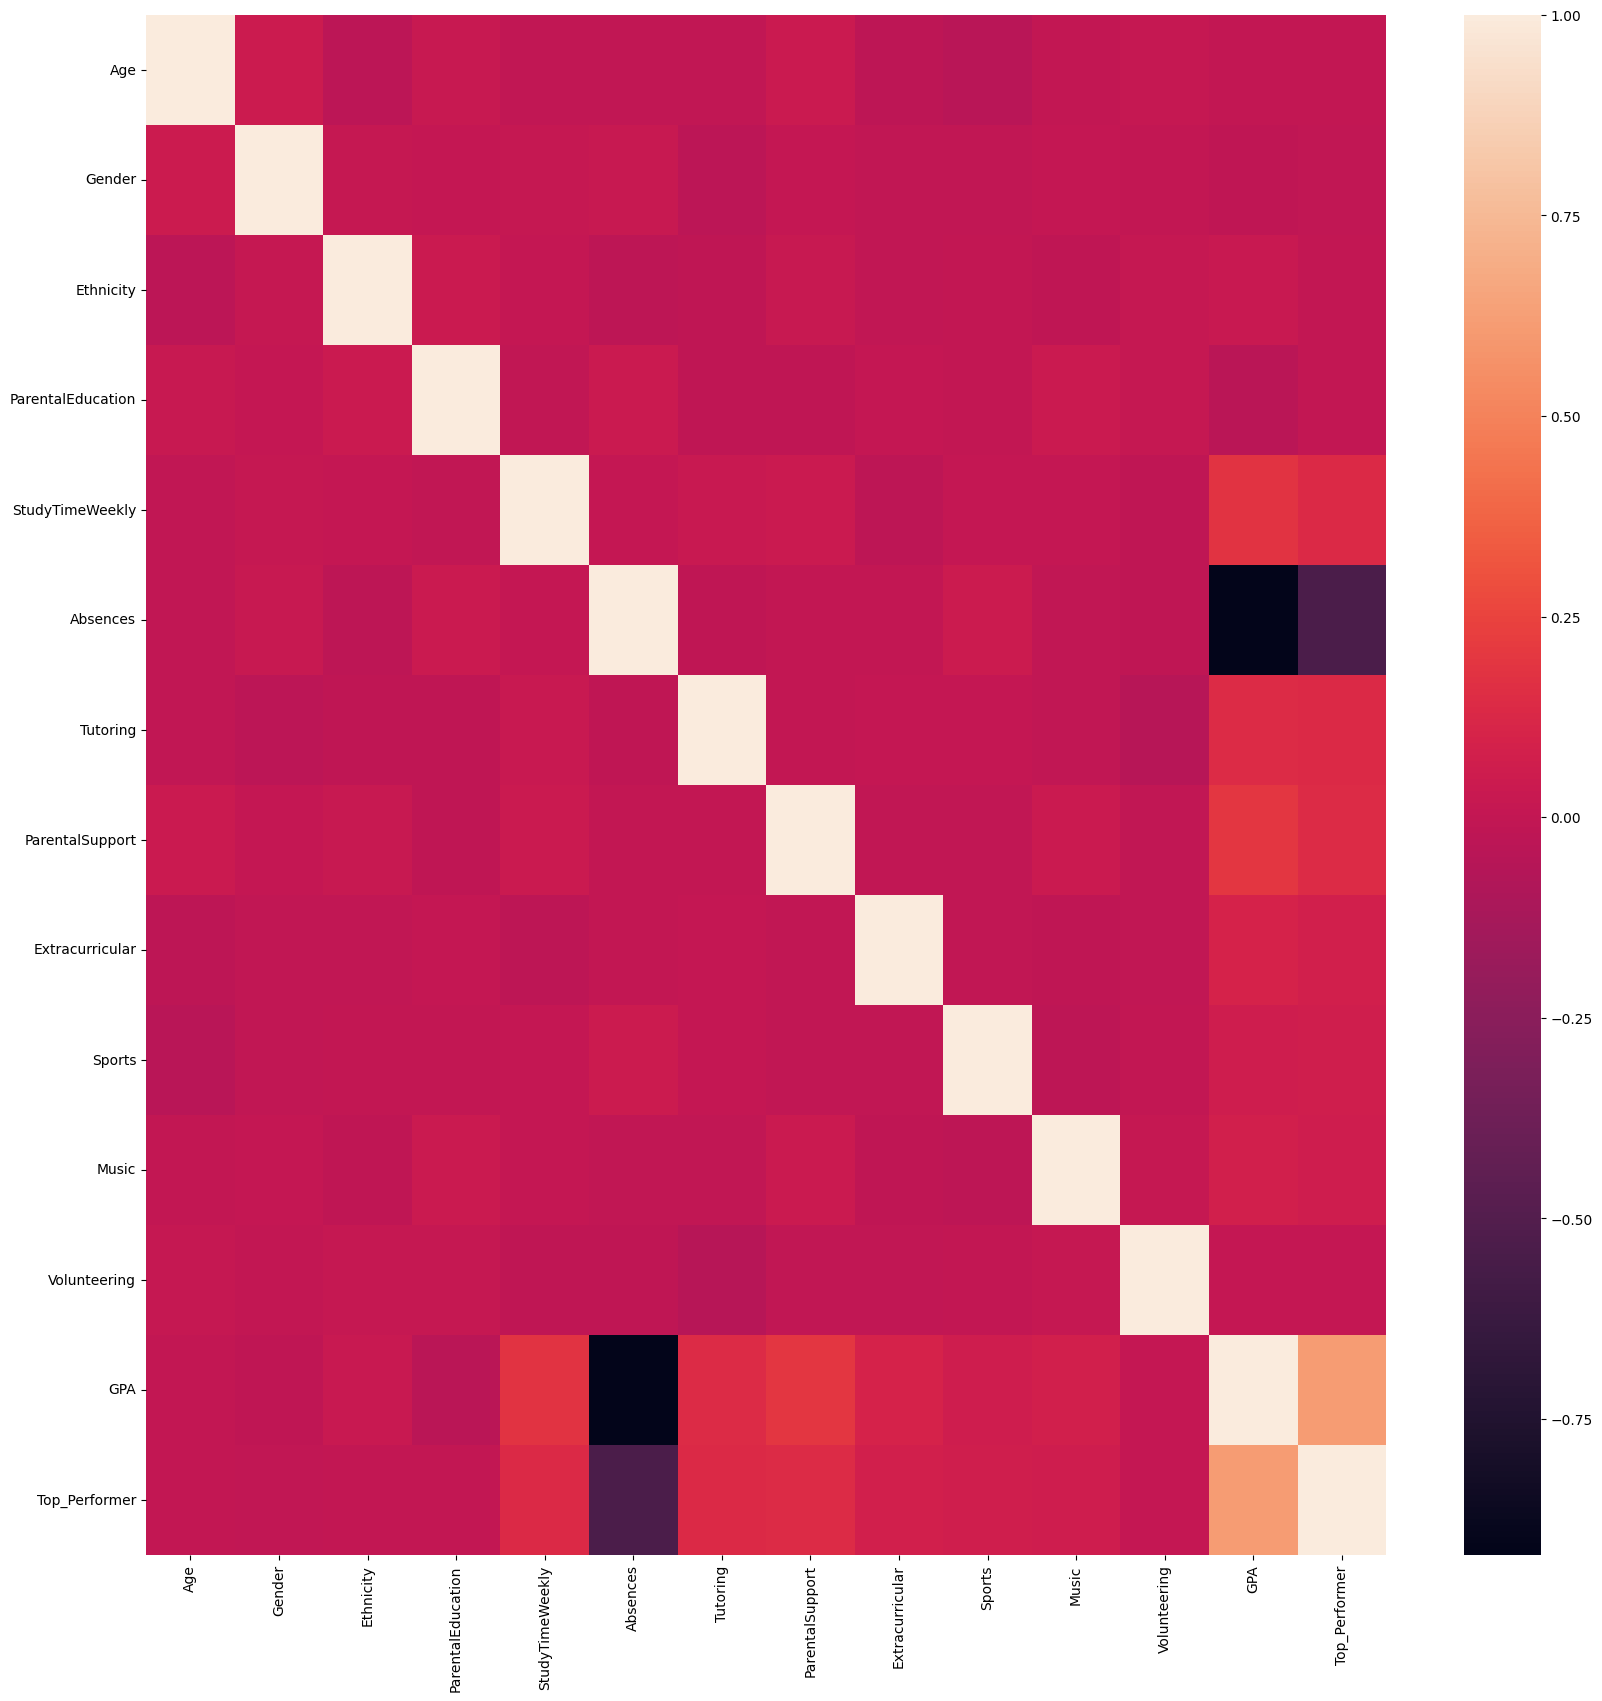

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(dfccorr)

View dataset columns

In [10]:
dfc.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'Top_Performer'],
      dtype='object')

Drop columns not needed for the classification model

In [11]:
dfc = dfc.drop(columns=['GPA',  'Tutoring', 'ParentalSupport', 'Extracurricular'])

Separating the target variable from the features as preparation for the classification model.

In [12]:
X = dfc.drop(columns=['Top_Performer'])
y = dfc['Top_Performer']

In [13]:
X.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,0,1,0
1,18,0,0,1,15.408756,0,0,0,0
2,15,0,2,3,4.210570,26,0,0,0
3,17,1,0,3,10.028829,14,0,0,0
4,17,1,0,2,4.672495,17,0,0,0


In [14]:
X.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Sports', 'Music', 'Volunteering'],
      dtype='object')

Creating a new dataframe to use to test the classification model's predictions.

In [15]:
new_data = pd.DataFrame([{
    'Age': 19, 
    'Gender': 1, 
    'Ethnicity': 2, 
    'ParentalEducation': 2, 
    'StudyTimeWeekly': 3,
    'Absences': 3, 
    'Sports': 1, 
    'Music': 0, 
    'Volunteering': 0

},
{
    'Age': 19, 
    'Gender': 1, 
    'Ethnicity': 2, 
    'ParentalEducation': 2, 
    'StudyTimeWeekly': 15.408,
    'Absences': 13, 
    'Sports': 0, 
    'Music': 0, 
    'Volunteering': 1

},
{
    'Age': 15, 
    'Gender': 0, 
    'Ethnicity': 1, 
    'ParentalEducation': 0, 
    'StudyTimeWeekly': 8,
    'Absences': 23, 
    'Sports': 1, 
    'Music': 1, 
    'Volunteering': 1

},
{
    'Age': 18, 
    'Gender': 0, 
    'Ethnicity': 3, 
    'ParentalEducation': 2, 
    'StudyTimeWeekly': 3,
    'Absences': 3, 
    'Sports': 1, 
    'Music': 1, 
    'Volunteering': 1

}
])

Splitting the data into training and testing sets.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# K-Nearest Neighbors (KNN) Classification.
Using the K-Nearest Neighbors (KNN) classification model to predict the top GPA performers in a high school.
Firt, initialise the KNN model with 3 neighbors.

Checking for the best number of neighbors to use in the KNN model.

In [17]:
neighbors_c = np.arange(1,13)
train_accuracy_c = {}
test_accuracy_c = {}

for neighbor in neighbors_c:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)

    train_accuracy_c[neighbor]=knn.score(X_train, y_train)
    test_accuracy_c[neighbor]=knn.score(X_test, y_test)

print(neighbors_c, '\n', train_accuracy_c, '\n', test_accuracy_c)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9477260846837429, 3: 0.9534762153685311, 4: 0.9419759539989545, 5: 0.9424986931521171, 6: 0.9388395190799791, 7: 0.9367485624673288, 8: 0.9372713016204913, 9: 0.9362258233141663, 10: 0.9367485624673288, 11: 0.9304756926293779, 12: 0.9320439100888657} 
 {1: 0.9081419624217119, 2: 0.9039665970772442, 3: 0.9123173277661796, 4: 0.9144050104384134, 5: 0.9102296450939458, 6: 0.9039665970772442, 7: 0.9081419624217119, 8: 0.9102296450939458, 9: 0.906054279749478, 10: 0.9081419624217119, 11: 0.9164926931106472, 12: 0.9164926931106472}


Visualising the best number of neighbors to use in the KNN model.

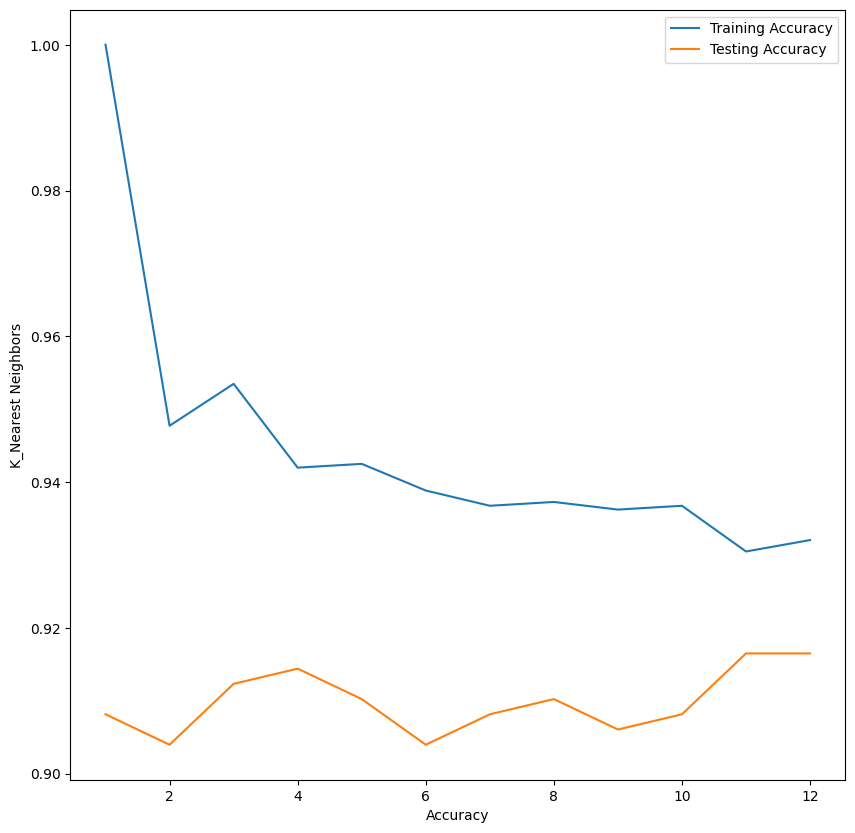

In [18]:
plt.figure(figsize=(10,10))
plt.plot(neighbors_c, list(train_accuracy_c.values()), label = 'Training Accuracy')
plt.plot(neighbors_c, list(test_accuracy_c.values()), label = 'Testing Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('K_Nearest Neighbors')
plt.legend()

Ideal number is 4 neighbors for both training and testing data. 
Using 4 neighbors in the KNN model.

In [19]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

Checking the accuracy of the KNN model.

In [20]:
y_knn_pred = knn.predict(X_test)

In [21]:
knn_accuracy_score = accuracy_score(y_test, y_knn_pred)

In [22]:
knn.score(X_test,y_test)

0.9144050104384134

In [23]:
knn.predict(new_data)

array([1, 0, 0, 0], dtype=int64)

In [24]:
knn_pred_new_data = knn.predict(new_data)

In [25]:
['Top' if x > 0 else 'Other' for x in knn_pred_new_data]

['Top', 'Other', 'Other', 'Other']

From the accuracy details above we can see that the first data point in row one of the dictionary is predicted to be a top performer and the other 3 rows are predicted to not be top performers. This is done with 91.44% accuracy.

# Decision Tree Classification

Setting an instance of the decision tree classifier to use to fit the model.

In [26]:
clf = DecisionTreeClassifier()

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Testing the accuracy of the decision tree model.

In [28]:
y_clf_pred = clf.predict(X_test)

In [29]:
decision_tree_accuracy_score=accuracy_score(y_test, y_clf_pred)

Importing plot_tree to visualise the decision tree model.

In [30]:
from sklearn.tree import plot_tree

[Text(0.5228658536585366, 0.9285714285714286, 'Absences <= 4.5\ngini = 0.233\nsamples = 1913\nvalue = [1656, 257]\nclass = GPA Above 3'),
 Text(0.2545731707317073, 0.7857142857142857, 'StudyTimeWeekly <= 9.072\ngini = 0.454\nsamples = 298\nvalue = [104.0, 194.0]\nclass = GPA Less than 3'),
 Text(0.3887195121951219, 0.8571428571428572, 'True  '),
 Text(0.10670731707317073, 0.6428571428571429, 'Absences <= 0.5\ngini = 0.5\nsamples = 138\nvalue = [70, 68]\nclass = GPA Above 3'),
 Text(0.036585365853658534, 0.5, 'StudyTimeWeekly <= 1.16\ngini = 0.26\nsamples = 26\nvalue = [4, 22]\nclass = GPA Less than 3'),
 Text(0.024390243902439025, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = GPA Above 3'),
 Text(0.04878048780487805, 0.35714285714285715, 'Age <= 17.5\ngini = 0.211\nsamples = 25\nvalue = [3, 22]\nclass = GPA Less than 3'),
 Text(0.024390243902439025, 0.21428571428571427, 'StudyTimeWeekly <= 5.291\ngini = 0.105\nsamples = 18\nvalue = [1, 17]\nclass = GPA Less tha

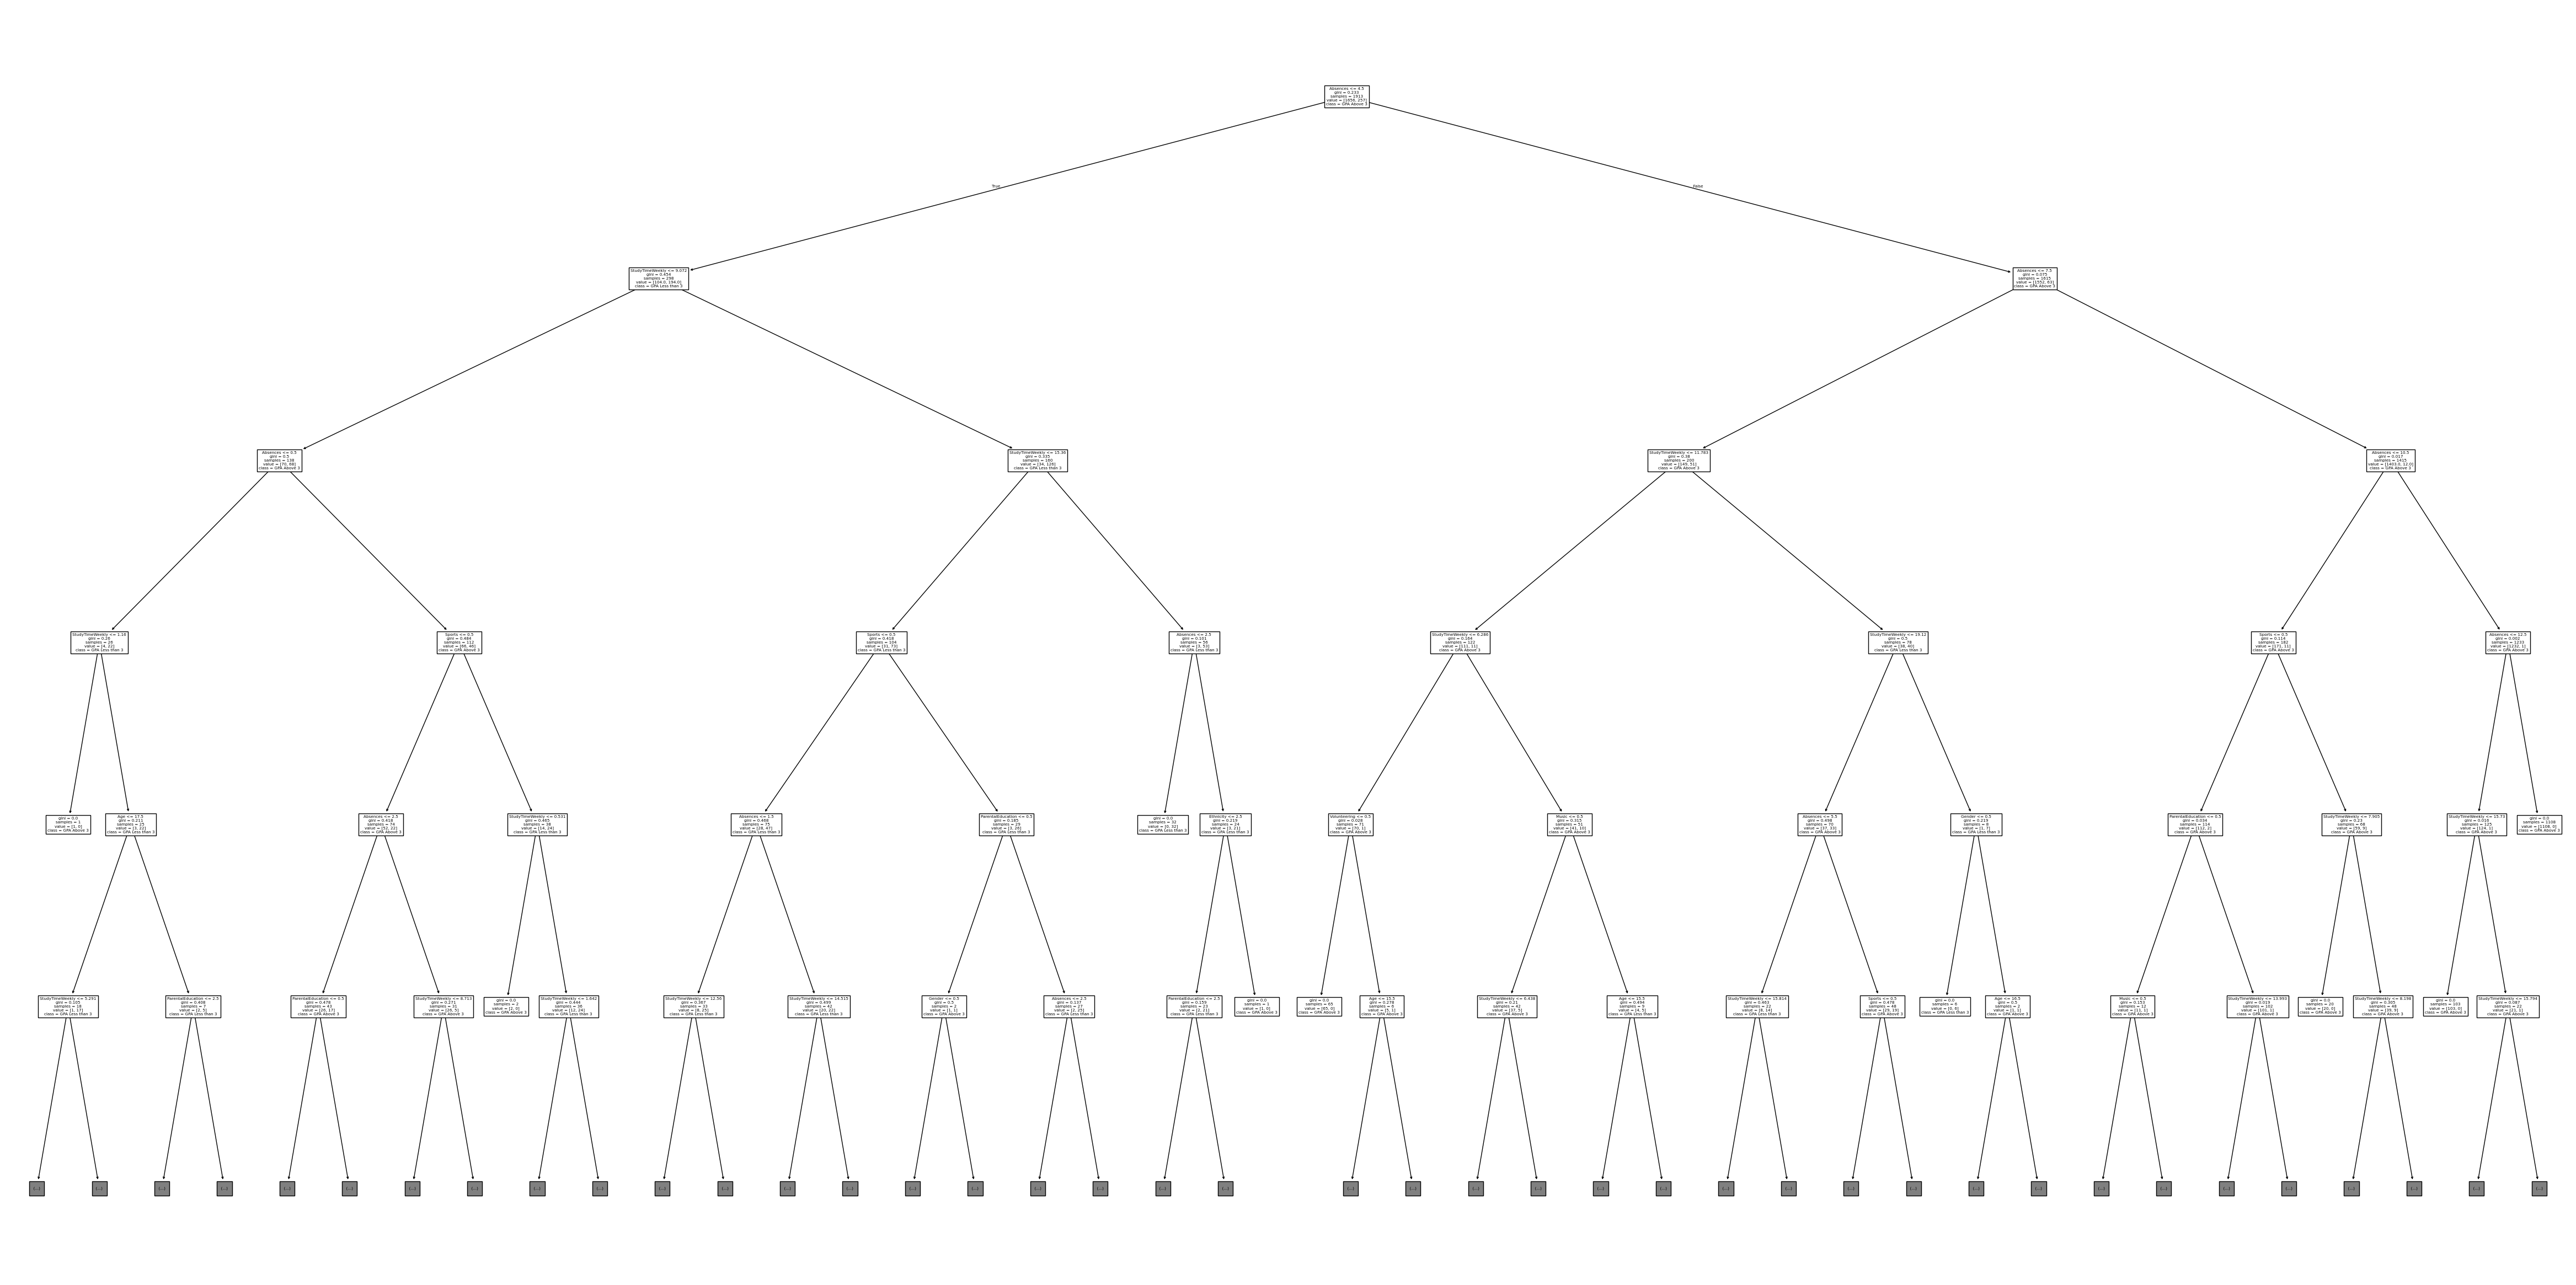

In [31]:
plt.figure(figsize=(60,30))
plot_tree(clf, max_depth=5, feature_names=list(X.columns),
class_names = ['GPA Above 3', 'GPA Less than 3'])

# Random Forest Classification

Setting an instance of the random forest classifier to use to fit the model.

In [32]:
forest = RandomForestClassifier()

In [33]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_forest_pred = forest.predict(X_test)

In [35]:
forest_accuracy_score = accuracy_score(y_test, y_forest_pred)

In [74]:
forest_accuracy_score

0.9102296450939458

Predicting the top performers using the random forest classifier with 91.02% accuracy.

In [36]:
forest_pred_new_data = forest.predict(new_data)
['Top' if x > 0 else 'Other' for x in forest_pred_new_data]

['Top', 'Other', 'Other', 'Other']

# Histogram-Based Gradient Boosting Classification

In [37]:
hist = HistGradientBoostingClassifier()

In [38]:
hist.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [39]:
y_hist_pred = hist.predict(X_test)

In [40]:
hist_gradient_accuracy_score = accuracy_score(y_test, y_hist_pred)

In [41]:
print(' knn_accuracy_score: ',knn_accuracy_score*100,'%',
    '\n', 
    'decision_tree_accuracy_score: ', decision_tree_accuracy_score*100, '%',
    '\n', 
    'forest_accuracy_score: ', forest_accuracy_score*100,'%',
    '\n', 
    'hist_gradient_accuracy_score: ', hist_gradient_accuracy_score*100,'%')

 knn_accuracy_score:  91.44050104384134 % 
 decision_tree_accuracy_score:  89.77035490605428 % 
 forest_accuracy_score:  91.02296450939458 % 
 hist_gradient_accuracy_score:  91.23173277661796 %


The best prediction is from knn_accuracy_score with 91.44% accuracy.

# Now to Regression to Predict GPA Scores in the same High School.

In [42]:
dfr = pd.read_csv(r"C:\Users\aa1\Desktop\python_projects\Tutorials\Basics-of-MI\Academic Performance of High School Students\High School Students Performance.csv")

Importing Algorithms and Libraries for Regression.

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

View the dataset.

In [44]:
dfr.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Dropping columns not needed for the regression model.

In [45]:
dfr=dfr.drop(columns=['GradeClass', 'StudentID'])

Using a variable to hold the dataset for regression.

In [46]:
dfrcorr = dfr.corr()

Using a heatmap to check for correlation between variables.

<Axes: >

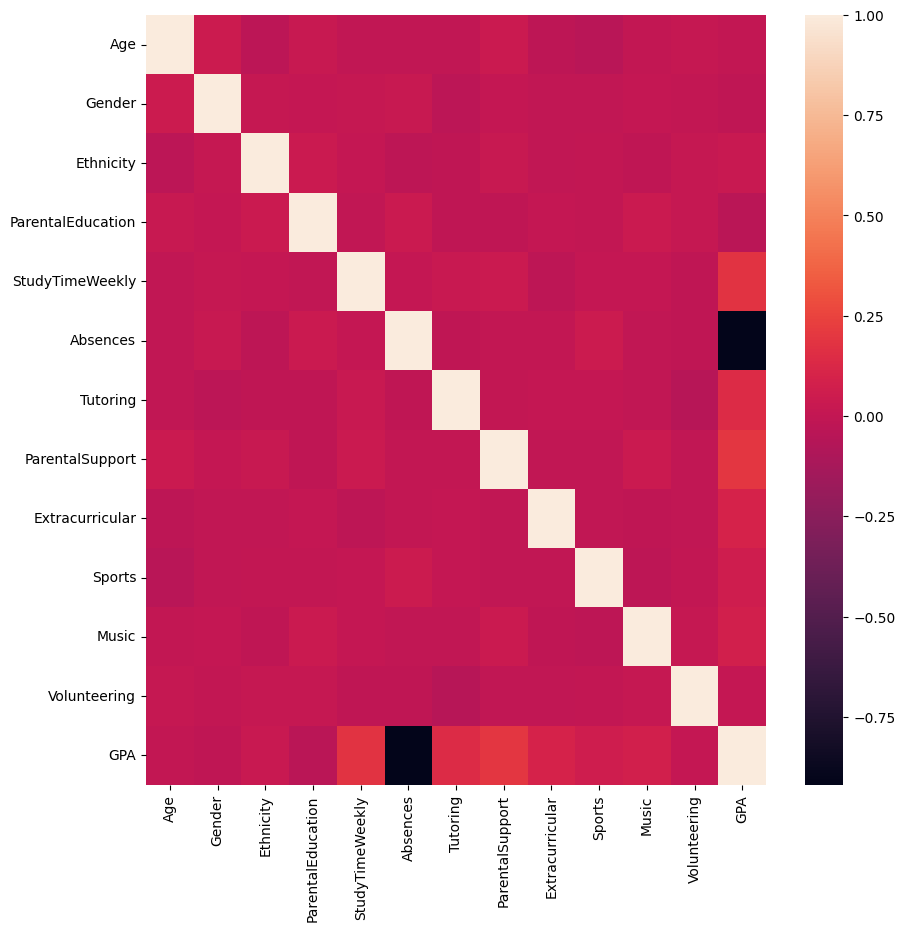

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(dfrcorr)

Separating the target variable from the features as preparation for the regression model.
Using X1 as the features and y1 as the target variable.

In [48]:
X1 = dfr.drop(columns=['GPA'])
y1 = dfr['GPA']

Splitting the data into training and testing sets.

In [49]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

In [50]:
neighbors_r = np.arange(1,13)
train_accuracy_r = {}
test_accuracy_r = {}

for neighbor in neighbors_r:
    knnr = KNeighborsRegressor(n_neighbors=neighbor)
    knnr.fit(X1_train, y1_train)

    train_accuracy_r[neighbor]=knnr.score(X1_train, y1_train)
    test_accuracy_r[neighbor]=knnr.score(X1_test, y1_test)

print(neighbors_r, '\n', train_accuracy_r, '\n', test_accuracy_r)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.9620081010443016, 3: 0.9494636908408783, 4: 0.94423736547849, 5: 0.9377768882458145, 6: 0.9341427803557094, 7: 0.930895727523761, 8: 0.9299130092188012, 9: 0.9281176195737569, 10: 0.9265285812312515, 11: 0.9253018831895132, 12: 0.9246687803087837} 
 {1: 0.8360858913685064, 2: 0.8657980471973593, 3: 0.884912230887061, 4: 0.8816983335120931, 5: 0.8850206984312537, 6: 0.8864464848569674, 7: 0.886530294570827, 8: 0.8874679574447218, 9: 0.8888714801754317, 10: 0.8887812390416208, 11: 0.8872240351571525, 12: 0.8870681605283279}


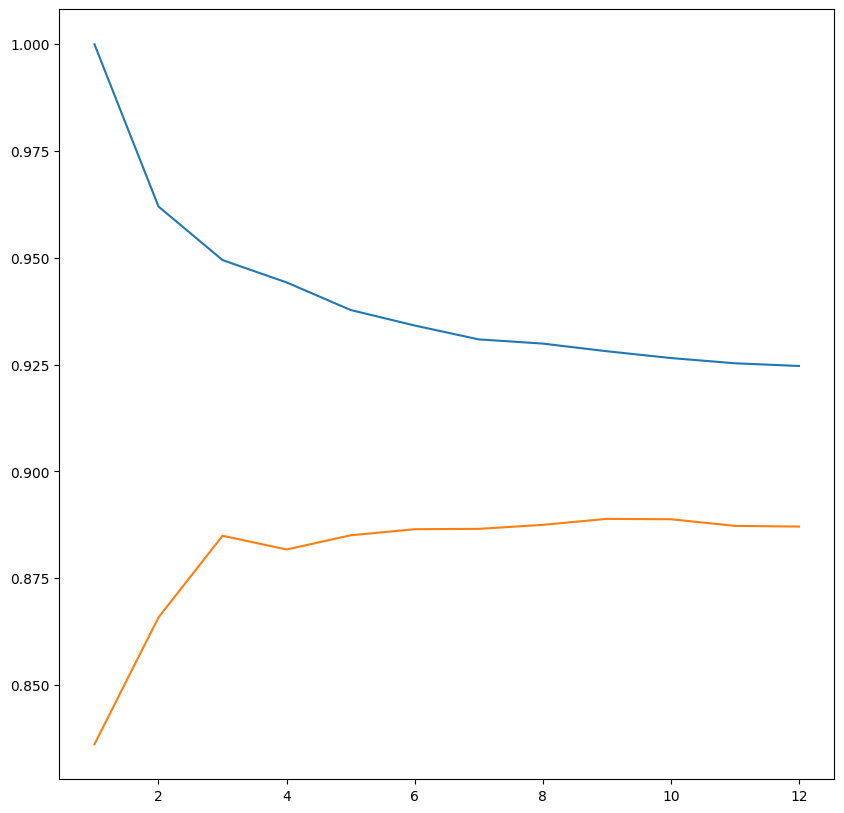

In [51]:
plt.figure(figsize=(10,10))
plt.plot(neighbors_r, list(train_accuracy_r.values()), label='Training Accuracy')
plt.plot(neighbors_r, list(test_accuracy_r.values()), label='Test Accuracy')

Ideal Number of Neighbors for the KNN Regression Model is 4.

Fitting the linear regression model using K-Near Neighbors.

In [52]:
knnr = KNeighborsRegressor(n_neighbors=4)
knnr.fit(X1_train, y1_train)

KNeighborsRegressor(n_neighbors=4)

Creating a variable to hold the predictions from the KNN regression model.

In [53]:
y_knnr_pred = knnr.predict(X1_test)

In [54]:
from sklearn.metrics import r2_score, root_mean_squared_error

In [55]:
root_mean_squared_error(y1_test, y_knnr_pred)

0.3100073317311334

In [56]:
knn_r2score=r2_score(y1_test, y_knnr_pred)

In [57]:
knn_r2score

0.8816983335120931

In [58]:
X1.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering'],
      dtype='object')

Creating new data to use to test the regression model's predictions.

In [59]:
new_data_4r = pd.DataFrame([{
    'Age': 15, 
    'Gender': 0, 
    'Ethnicity': 2, 
    'ParentalEducation': 1, 
    'StudyTimeWeekly': 5.8, 
    'Absences': 19, 
    'Tutoring': 1, 
    'ParentalSupport': 2, 
    'Extracurricular': 1, 
    'Sports': 0, 
    'Music': 1, 
    'Volunteering': 0
},
{
    'Age': 17, 
    'Gender': 0, 
    'Ethnicity': 1, 
    'ParentalEducation': 0, 
    'StudyTimeWeekly': 15.8, 
    'Absences': 1, 
    'Tutoring': 0, 
    'ParentalSupport': 4, 
    'Extracurricular': 0, 
    'Sports': 0, 
    'Music': 0, 
    'Volunteering': 0
},
{
    'Age': 15, 
    'Gender': 0, 
    'Ethnicity': 2, 
    'ParentalEducation': 1, 
    'StudyTimeWeekly': 5.8, 
    'Absences': 19, 
    'Tutoring': 1, 
    'ParentalSupport': 3, 
    'Extracurricular': 1, 
    'Sports': 1, 
    'Music': 1, 
    'Volunteering': 1
}

])

Predicting the GPA scores using the KNN regression model with 89.856% accuracy.

In [60]:
knnr.predict(new_data_4r)

array([1.40406192, 3.28549406, 1.40406192])

# Trying the same with Random Forest Regression

In [61]:
rforest = RandomForestRegressor()
rforest.fit(X1_train, y1_train)

RandomForestRegressor()

In [62]:
y_rforest_pred = rforest.predict(X1_test)

In [63]:
root_mean_squared_error(y1_test, y_rforest_pred)

0.2554761113365541

In [64]:
forest_r2score=r2_score(y1_test, y_rforest_pred)

In [65]:
forest_r2score

0.919657095803942

Predicting the GPA Scores using the Random Forest Regression Model for the new data with 91.97% accuracy.

In [66]:
rforest.predict(new_data_4r)

array([1.49821483, 3.41718924, 1.65415753])

In [67]:
rhist = HistGradientBoostingRegressor()
rhist.fit(X1_train, y1_train)

HistGradientBoostingRegressor()

In [68]:
y_rhist_pred = rhist.predict(X1_test)

In [69]:
root_mean_squared_error(y1_test, y_rhist_pred)

0.2267865504497102

In [70]:
histgrad_r2score=r2_score(y1_test, y_rhist_pred)

In [71]:
histgrad_r2score

0.9366886575062328

Predicting the GPA scores using Histogram-Based Gradient Boosting Regression Model for the new data with 93.67% accuracy.

In [72]:
rhist.predict(new_data_4r)

array([1.56036577, 3.44720252, 1.85270861])

Comparing the accuracy of the three regression models.

In [73]:
print(' knn_r2score:', knn_r2score, '\n', 'forest_r2score:', forest_r2score, '\n', 'histgrad_r2score: ', histgrad_r2score, '\n')

 knn_r2score: 0.8816983335120931 
 forest_r2score: 0.919657095803942 
 histgrad_r2score:  0.9366886575062328 



histgrad_r2score has the best prediction with 93.67% accuracy.